In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\bebec\OneDrive\Área de Trabalho\INSPER\CDADOS\CD22-2\Projeto2\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [35]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','ARR_DEL15','CANCELLED','DISTANCE']]
Novos_dados_2019["Ano"]="2019"
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,0.0,300.0,2019
1,9E,MSP,CVG,0.0,0.0,596.0,2019
2,9E,DTW,CVG,0.0,0.0,229.0,2019
3,9E,TLH,ATL,0.0,0.0,223.0,2019
4,9E,ATL,FSM,0.0,0.0,579.0,2019


In [37]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','ARR_DEL15','CANCELLED','DISTANCE']]
Novos_dados_2020["Ano"]="2020"
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,0.0,174.0,2020
1,EV,TUL,ORD,0.0,0.0,585.0,2020
2,EV,EWR,TYS,0.0,0.0,631.0,2020
3,EV,BTR,IAH,0.0,0.0,253.0,2020
4,EV,RIC,IAH,0.0,0.0,1157.0,2020


In [56]:
Dados_gerais = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

Dados_gerais['OP_CARRIER'] = Dados_gerais['OP_CARRIER'].astype('category')
Dados_gerais['ORIGIN'] = Dados_gerais['ORIGIN'].astype('category')
Dados_gerais['DEST'] = Dados_gerais['DEST'].astype('category')
Dados_gerais['CANCELLED'] = Dados_gerais['CANCELLED'].astype('category')
Dados_gerais['ARR_DEL15'] = Dados_gerais['ARR_DEL15'].astype('category')


In [57]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [58]:
Dados_gerais['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']

In [59]:
Dados_gerais.head(5)


,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
0,Atlatic Southeast Airlines,ORD,GRB,0.0,0.0,174.0,2020
1,Atlatic Southeast Airlines,ORD,GRB,0.0,0.0,174.0,2020
2,Atlatic Southeast Airlines,ORD,GRB,0.0,0.0,174.0,2020
3,Atlatic Southeast Airlines,ORD,GRB,0.0,0.0,174.0,2020
4,Atlatic Southeast Airlines,ORD,GRB,0.0,0.0,174.0,2020


In [47]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER        0
ORIGIN            0
DEST              0
ARR_DEL15     23654
CANCELLED         0
DISTANCE          0
Ano               0
dtype: int64
23654
OP_CARRIER       0
ORIGIN           0
DEST             0
ARR_DEL15     2446
CANCELLED        0
DISTANCE         0
Ano              0
dtype: int64
1167677


In [60]:
# REGRESSÃO MULTIPLA DE TESTE
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3)



,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,1167677.0,801.283,590.548,31.0,368.0,641.0,1042.0,5095.0
1.0,23654.0,630.156,453.121,31.0,299.0,522.0,836.0,4475.0


CANCELLED,0.0,1.0
OP_CARRIER,,
Endeavor,99.0,1.0
American Airlines Cargo,98.6,1.4
Alaska Airlines,98.3,1.7
JetBlue,98.0,2.0
Delta Air Lines,99.8,0.2
Atlatic Southeast Airlines,95.3,4.7
Frontier Flight,98.7,1.3
Allegiant Air,99.1,0.9
Hawaiian Airlines,99.8,0.2


None


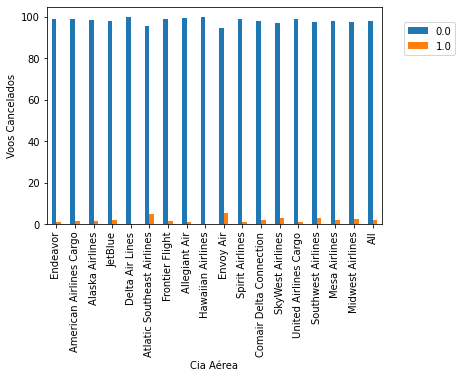

CANCELLED,0.0,1.0
DEST,,
ABE,97.2,2.8
ABI,98.2,1.8
ABQ,98.9,1.1
ABR,96.8,3.2
ABY,99.4,0.6
...,...,...
XNA,98.1,1.9
XWA,98.5,1.5
YAK,90.8,9.2


None


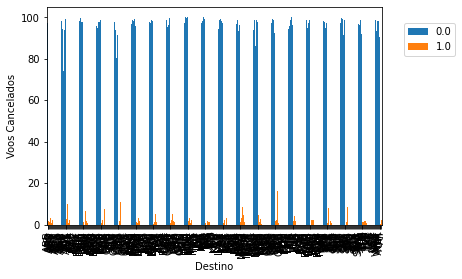

CANCELLED,0.0,1.0
ORIGIN,,
ABE,96.9,3.1
ABI,97.9,2.1
ABQ,98.5,1.5
ABR,96.8,3.2
ABY,99.4,0.6
...,...,...
XNA,97.8,2.2
XWA,98.5,1.5
YAK,89.2,10.8


None


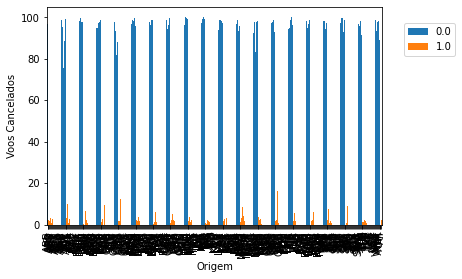

CANCELLED,0.0
ARR_DEL15,
0.0,100.0
1.0,100.0
All,100.0


None


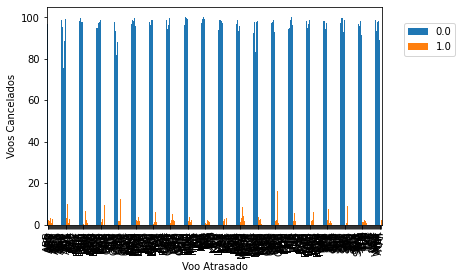

In [63]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'], normalize='index', margins=True).round(3)*100
print(display(cia_canc))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
print(display(dest_canc))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
print(display(org_canc))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Atrasados X Cancelados
del_canc = pd.crosstab(Dados_gerais['ARR_DEL15'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
print(display(del_canc))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Voo Atrasado')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

In [ ]:
Treinamento.corr()


,ARR_DEL15,CANCELLED,DISTANCE
ARR_DEL15,1.00000,NaN,0.006990
CANCELLED,NaN,1.000000,-0.040538
DISTANCE,0.00699,-0.040538,1.000000


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [38]:
Treinamento = Dados_gerais.sample(frac = 0.7)

Teste = Dados_gerais.drop(Treinamento.index)

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [ ]:
# código de validação de resultados 